In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
matches = pd.read_csv("IPL Matches 2008-2020.csv")
deliveries = pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")

In [3]:
team_names = matches.team1.unique()
team_names

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [4]:
team_names_abv = ["RCB", "KXIP", "DD", "MI", "KKR", "RR", "DeCh", "CSK", "KTK", "PWI", "SH", "GL", "RPS", "RPS", "DC"]

In [5]:
matches.replace(team_names, team_names_abv, inplace=True)

In [6]:
matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,RCB,KKR,RCB,field,KKR,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,KXIP,CSK,CSK,bat,CSK,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,DD,RR,RR,bat,DD,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,MI,RCB,MI,bat,RCB,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,KKR,DeCh,DeCh,bat,KKR,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,RCB,MI,MI,field,RCB,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,MI,DC,DC,field,MI,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,RCB,SH,SH,field,SH,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,DC,SH,DC,bat,DC,runs,17.0,N,NaN,PR Reiffel,S Ravi


<AxesSubplot:>

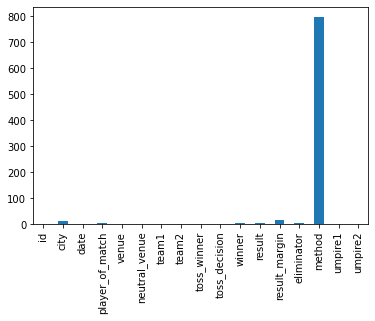

In [7]:
matches.isnull().sum().plot(kind='bar')

In [8]:
matches = matches.fillna(value={'method':0})

In [9]:
matches[matches.result.isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,DD,PWI,DD,bat,NaN,NaN,NaN,NaN,0,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,RCB,RR,RR,field,NaN,NaN,NaN,NaN,0,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,RCB,DD,RCB,field,NaN,NaN,NaN,NaN,0,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,RCB,RR,RR,field,NaN,NaN,NaN,NaN,0,UV Gandhe,NJ Llong


In [10]:
matches = matches[matches['result'].notnull()]

In [11]:
matches.loc[matches.result=='tie', 'result_margin']=0

In [12]:
matches.venue[matches.city.isnull()]

399                Sharjah Cricket Stadium
402    Dubai International Cricket Stadium
403    Dubai International Cricket Stadium
404                Sharjah Cricket Stadium
406                Sharjah Cricket Stadium
407    Dubai International Cricket Stadium
408                Sharjah Cricket Stadium
409    Dubai International Cricket Stadium
410    Dubai International Cricket Stadium
413                Sharjah Cricket Stadium
414                Sharjah Cricket Stadium
415    Dubai International Cricket Stadium
417    Dubai International Cricket Stadium
Name: venue, dtype: object

In [13]:
matches.city[matches.venue =='Dubai International Cricket Stadium'].unique()

array([nan, 'Dubai'], dtype=object)

In [14]:
matches.city[matches.venue == 'Sharjah Cricket Stadium'].unique()

array([nan, 'Sharjah'], dtype=object)

In [15]:
def venue_func(x):
    if x == 'Dubai International Cricket Stadium':
        return 'Dubai'
    if x == 'Sharjah Cricket Stadium':
        return 'Sharjah'
    else :
        return x
    
matches.city = matches.venue.apply(venue_func)

In [16]:
matches.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
method             0
umpire1            0
umpire2            0
dtype: int64

<AxesSubplot:>

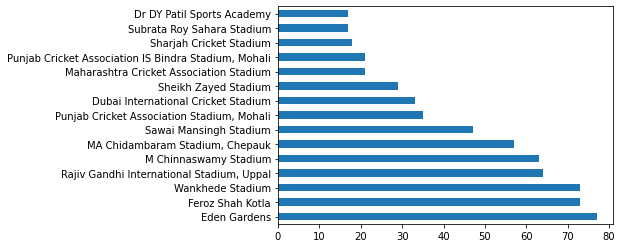

In [17]:
matches.venue.value_counts()[:15].plot(kind = 'barh')

In [18]:
matches.loc[matches.method == 'D/L',['venue']].value_counts()

venue                                              
Eden Gardens                                           4
Feroz Shah Kotla                                       3
M Chinnaswamy Stadium                                  3
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium    2
Rajiv Gandhi International Stadium, Uppal              2
Kingsmead                                              1
Nehru Stadium                                          1
Newlands                                               1
Sawai Mansingh Stadium                                 1
SuperSport Park                                        1
dtype: int64

<AxesSubplot:ylabel='toss_decision'>

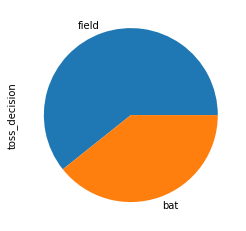

In [19]:
matches.toss_decision.value_counts().plot(kind = 'pie')

<AxesSubplot:ylabel='toss_winner'>

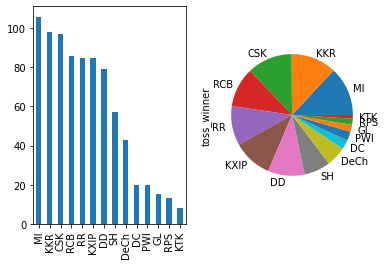

In [20]:
plt.subplot(1,2,1)
matches.toss_winner.value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
matches.toss_winner.value_counts().plot(kind = 'pie')

<AxesSubplot:>

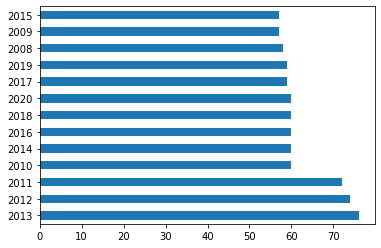

In [21]:
matches['season'] = matches['date'].str[:4].astype(int)
matches.season.value_counts().plot(kind = 'barh')

<AxesSubplot:>

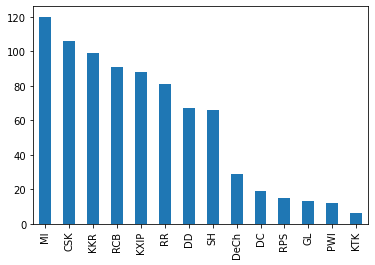

In [22]:
total_win = matches.winner.value_counts()
total_win.plot(kind = 'bar')

<AxesSubplot:>

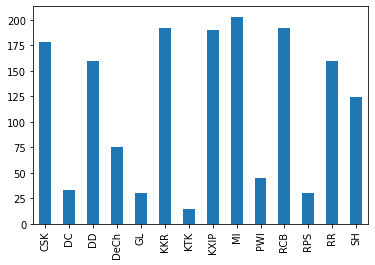

In [23]:
total_matches = (matches.team1.value_counts()+ matches.team2.value_counts())
total_matches.plot(kind = 'bar')

<AxesSubplot:>

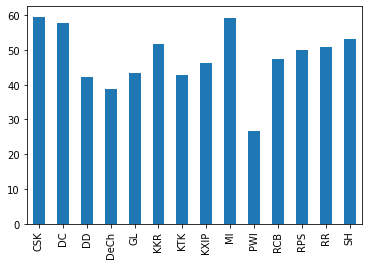

In [24]:
win_percentage = total_win/total_matches*100
win_percentage.plot(kind = 'bar')

<AxesSubplot:ylabel='winner'>

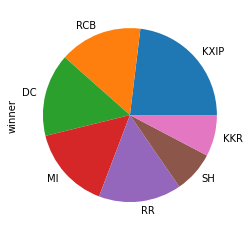

In [25]:
matches.winner[matches.eliminator =='Y'].value_counts().plot(kind = 'pie')

In [26]:
deliveries.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [27]:
deliveries.replace(team_names,team_names_abv,inplace = True)

<AxesSubplot:xlabel='inning', ylabel='count'>

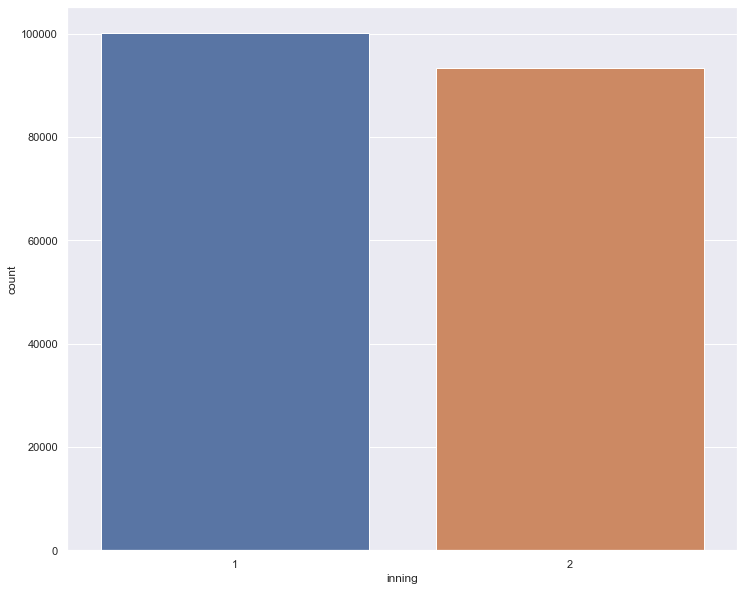

In [28]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})
sns.countplot(x=deliveries.inning)

In [29]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

<AxesSubplot:>

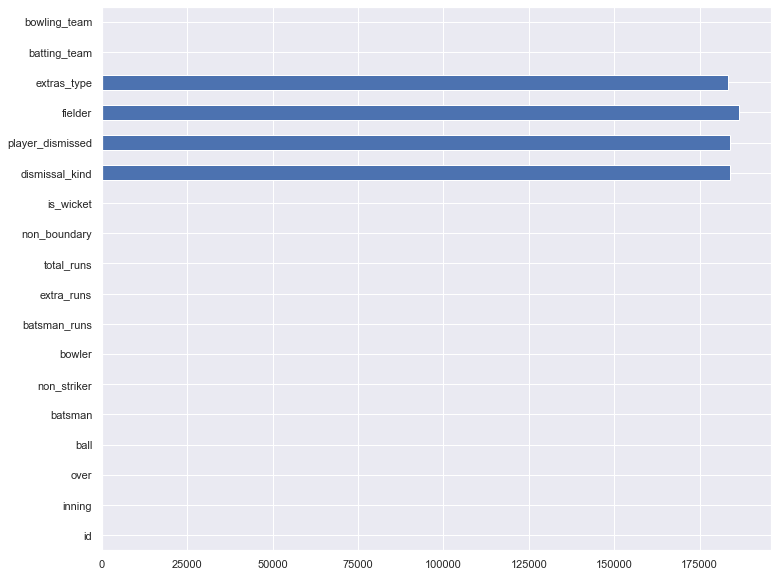

In [30]:
deliveries.isnull().sum().plot(kind = 'barh')

In [31]:
deliveries['dismissal_kind'].value_counts()

caught                   5743
bowled                   1700
run out                   893
lbw                       571
stumped                   294
caught and bowled         269
hit wicket                 12
retired hurt               11
obstructing the field       2
Name: dismissal_kind, dtype: int64